### <p align=center> **EDA OF THE S&P 500 DATASETS** <p>

In [130]:
#Importamos las librerias necesarias 

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

## **Downloading our first dataframe**

In [131]:
snp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

df = pd.read_html(snp500url)[0]

In [132]:
df['Symbol'] = df['Symbol'].str.replace('.', '-')

In [133]:
tickers = df['Symbol'].tolist()

In [134]:
snp500 = pd.DataFrame()

In [135]:
for symbol in tickers:
    print(f"Descargando datos para {symbol}...")
    df = yf.download(symbol, start='2000-01-01', end='2023-02-22')
    if len(df) > 0:
        df['Symbol'] = symbol
        snp500 = snp500.append(df)

Descargando datos para MMM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AOS...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ABT...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ABBV...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ACN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ATVI...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADBE...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADP...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AAP...
[*********************100%***********************]  1 of 1 completed
Descarg

### **saving the data frame**

In [226]:
# I save the snp500 dataframe in csv file

snp500.to_csv('databases/snp500.csv')

In [228]:
# We open the snp500 dataframe

snp_500 = pd.read_csv('databases/snp500.csv')

In [229]:
# We review our data frame

snp_500

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525517,2173400,MMM
1,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511255,2713800,MMM
2,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221233,3699400,MMM
3,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249746,5975800,MMM
4,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790693,4101200,MMM
...,...,...,...,...,...,...,...,...
2616657,2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,ZTS
2616658,2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,ZTS
2616659,2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,ZTS
2616660,2023-02-17,172.149994,173.289993,170.259995,172.029999,172.029999,1954500,ZTS


In [230]:
# We look for duplicate values ​​in our dataframe

snp_500[snp_500.duplicated()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol


In [231]:
# We look for null values ​​in our dataframe

snp_500.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [233]:
# Review our dataframe snp_500
snp_500

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525517,2173400,MMM
1,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511255,2713800,MMM
2,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221233,3699400,MMM
3,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249746,5975800,MMM
4,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790693,4101200,MMM
...,...,...,...,...,...,...,...,...
2616657,2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,ZTS
2616658,2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,ZTS
2616659,2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,ZTS
2616660,2023-02-17,172.149994,173.289993,170.259995,172.029999,172.029999,1954500,ZTS


In [236]:
# We make the index the date column to analyze
snp_500.set_index('Date', inplace=True)

snp_500.index = pd.to_datetime(snp_500.index)

In [237]:
# We review our dataframe snp_500
snp_500

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525517,2173400,MMM
2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511255,2713800,MMM
2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221233,3699400,MMM
2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249746,5975800,MMM
2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790693,4101200,MMM
...,...,...,...,...,...,...,...
2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,ZTS
2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,ZTS
2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,ZTS


In [238]:
# We analyze the data
snp_500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2616662 entries, 2000-01-03 to 2023-02-21
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Open       float64
 1   High       float64
 2   Low        float64
 3   Close      float64
 4   Adj Close  float64
 5   Volume     int64  
 6   Symbol     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 159.7+ MB


In [239]:
# We analyze the descriptive statistics
snp_500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2.616662e+06,2.616662e+06,2.616662e+06,2.616662e+06,2.616662e+06,2.616662e+06
mean,7.261109e+01,7.347061e+01,7.172961e+01,7.262186e+01,6.427806e+01,6.619303e+06
std,1.446399e+02,1.464651e+02,1.428102e+02,1.446743e+02,1.414068e+02,3.219557e+07
min,6.041700e-02,6.104200e-02,5.395800e-02,6.104200e-02,6.104200e-02,0.000000e+00
25%,2.325000e+01,2.358000e+01,2.292000e+01,2.325403e+01,1.682737e+01,9.046000e+05
50%,4.242000e+01,4.293921e+01,4.190812e+01,4.243000e+01,3.314692e+01,2.055530e+06
75%,7.713888e+01,7.795000e+01,7.630000e+01,7.715000e+01,6.645602e+01,4.853700e+06
max,5.977610e+03,5.982450e+03,5.884060e+03,5.959330e+03,5.959330e+03,7.421641e+09


In [240]:
snp_500_drp = snp_500.drop(['Symbol','day'],axis=1) 

### <p align=center> We Analyze with a boxplot
 <p>

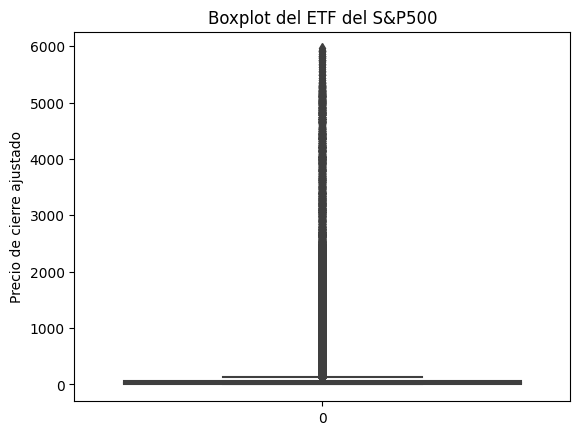

In [281]:
# # We will analyze our variables with a Boxplot
sns.boxplot(data=snp_500_drp['Adj Close'])

plt.title('Boxplot del ETF del S&P500')
plt.ylabel('Precio de cierre ajustado')

plt.show()

### <p align=center> We Analyze with a Correlation Matrix  <p> 

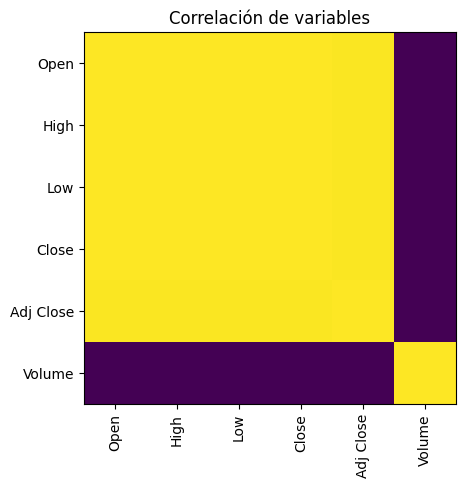

In [241]:
# We will analyze our variables with a Correlation Matrix
plt.matshow(snp_500_drp.corr())  
plt.title('Correlación de variables')
plt.xticks(range(len(snp_500_drp.columns)), snp_500_drp.columns, rotation=90)
plt.yticks(range(len(snp_500_drp.columns)), snp_500_drp.columns)
plt.gca().xaxis.tick_bottom()
plt.show()

### <p align=center> We Analyze with a Scaterplot_matrix <p>

array([[<AxesSubplot: xlabel='Open', ylabel='Open'>,
        <AxesSubplot: xlabel='High', ylabel='Open'>,
        <AxesSubplot: xlabel='Low', ylabel='Open'>,
        <AxesSubplot: xlabel='Close', ylabel='Open'>,
        <AxesSubplot: xlabel='Adj Close', ylabel='Open'>,
        <AxesSubplot: xlabel='Volume', ylabel='Open'>],
       [<AxesSubplot: xlabel='Open', ylabel='High'>,
        <AxesSubplot: xlabel='High', ylabel='High'>,
        <AxesSubplot: xlabel='Low', ylabel='High'>,
        <AxesSubplot: xlabel='Close', ylabel='High'>,
        <AxesSubplot: xlabel='Adj Close', ylabel='High'>,
        <AxesSubplot: xlabel='Volume', ylabel='High'>],
       [<AxesSubplot: xlabel='Open', ylabel='Low'>,
        <AxesSubplot: xlabel='High', ylabel='Low'>,
        <AxesSubplot: xlabel='Low', ylabel='Low'>,
        <AxesSubplot: xlabel='Close', ylabel='Low'>,
        <AxesSubplot: xlabel='Adj Close', ylabel='Low'>,
        <AxesSubplot: xlabel='Volume', ylabel='Low'>],
       [<AxesSubplot: xlabel

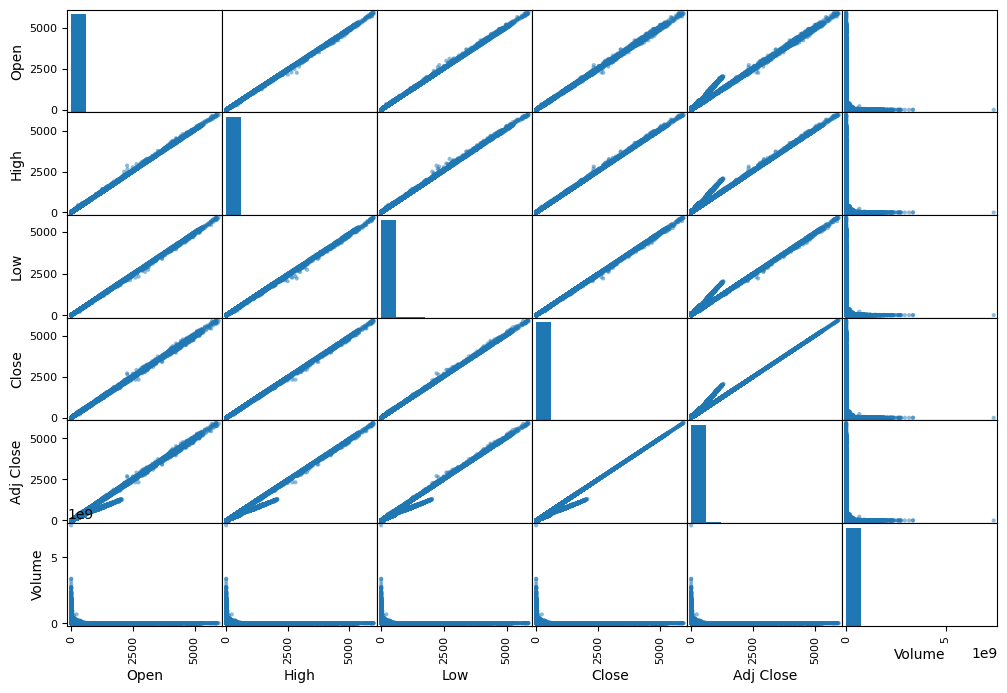

In [255]:
# We will analyze our variables with a Scatterplot matrix
pd.plotting.scatter_matrix(snp_500_drp[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']],figsize=(12,8))

### <p align=center> We make a plot of Volumen vs Time <p>

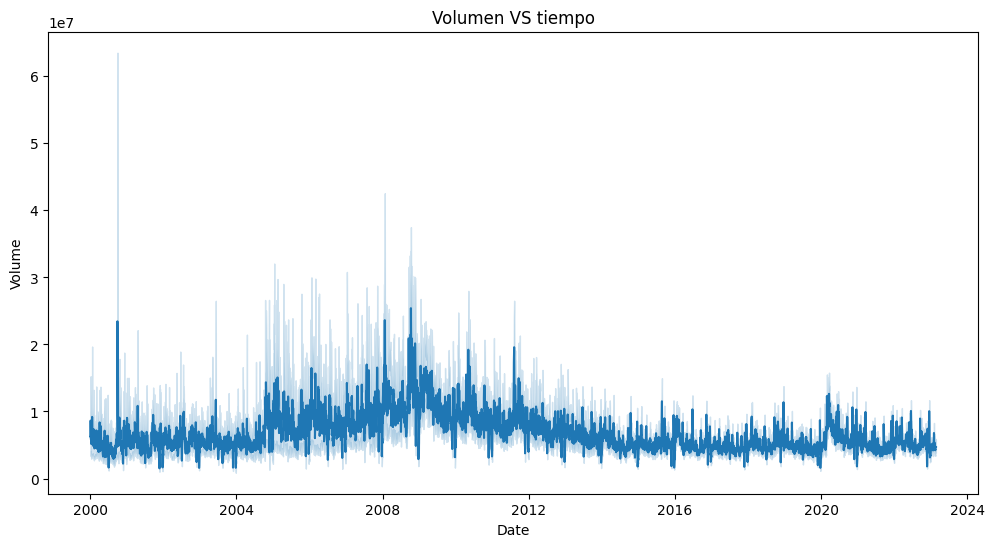

In [242]:
# We make a plot for volumen vs time
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x="Date", y="Volume", data=snp_500_drp, ax=ax,)
ax.set(title="Volumen VS time")
plt.show()

### the volume of transactions presents a lot of variation and noise. Also, there seem to be some spikes coinciding with the financial crisis of 2008 and the COVID-19 pandemic in 2020..

### <p align=center> We Analyze the Closing price vs days <p>

In [263]:
# Changing the indices by adding the date as a column since it brought it as an index
sp_500_rst= snp_500.reset_index()

In [264]:
# We create the column Day of the week that will help us to analyze later
sp_500_rst['day'] = sp_500_rst['Date'].dt.day_name()

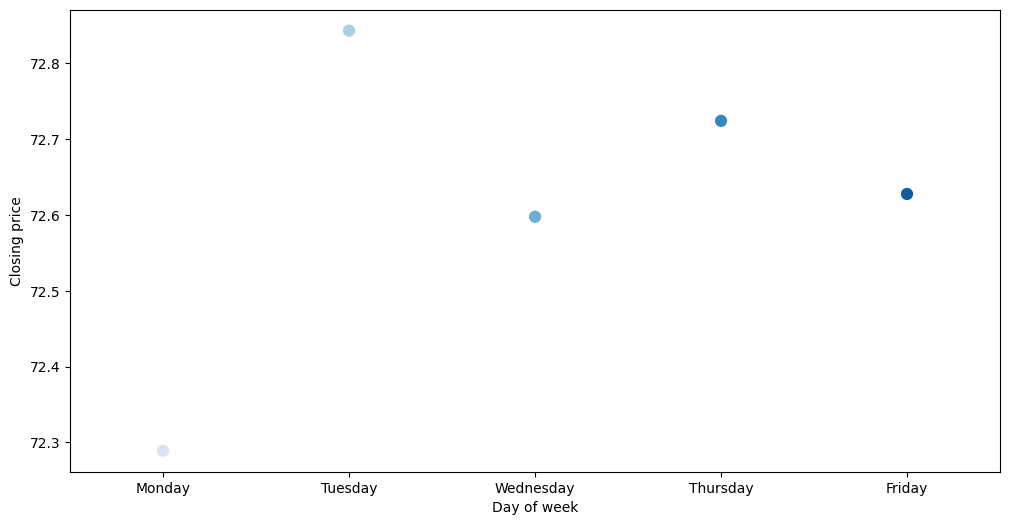

In [274]:
plt.figure(figsize=(12, 6), dpi=100)
sns.pointplot(x='day', y='Close', data=sp_500_rst, ci=None, palette='Blues')
plt.xlabel('Day of week')
plt.ylabel('Closing price')
plt.show()

#### from this we can say that tuesday and thursday are favorable days for investment

### <p align=center> We look at a graphic of the evolution of the closing price <p>

In [289]:
# Create a column containing the years
snp_500_drp['Year'] = snp_500_drp.index.year

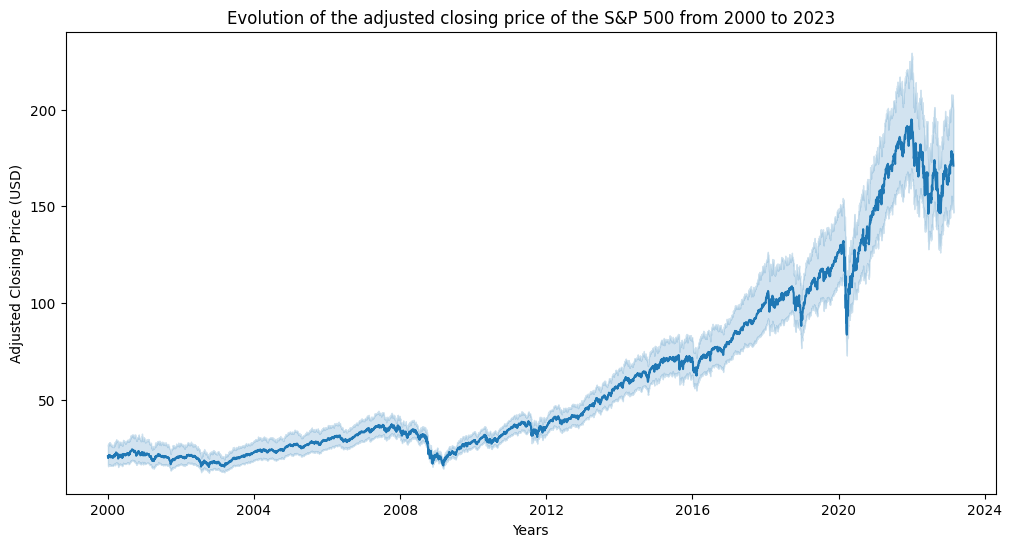

In [291]:
# Analyisis of the adjusting closing time
plt.figure(figsize=(12,6))
sns.lineplot(x=snp_500_drp.index, y=snp_500_drp['Adj Close'])
plt.title('Evolution of the adjusted closing price of the S&P 500 from 2000 to 2023')
plt.xlabel('Years')
plt.ylabel('Adjusted Closing Price (USD)')
plt.show()

### <p align=center> We calculate the volatility<p>

In [293]:
# Calculate annual volatility
snp_500_drp['day_rtrn'] = snp_500_drp['Adj Close'].pct_change()
rolling_volatility = snp_500_drp['day_rtrn'].rolling(window=252).std() * np.sqrt(252)
annual_volatility = rolling_volatility.resample('Y').last()

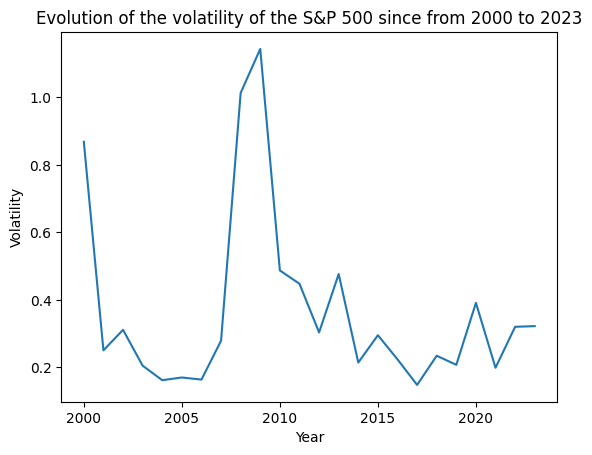

In [294]:
# Plot annual volatility
plt.plot(annual_volatility.index.year, annual_volatility.values)
plt.title('Evolution of the volatility of the S&P 500 since from 2000 to 2023')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.show()

#### Volatility refers to the variation in the prices of the 500 stocks that make up the index over a given period of time.

## **Downloading our second dataframe**

In [394]:
snp500_indexurl = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

df_1 = pd.read_html(snp500url)

In [395]:
snp500_index = df_1[0]

In [396]:
# Clean the 'Symbol' column 
snp500_index['Symbol'] = snp500_index['Symbol'].str.replace('.', '-')

In [397]:
# We search for duplicated values
snp500_index[snp500_index.duplicated()]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


In [398]:
# We search for missing values
snp500_index.fillna(0)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [399]:
#
snp500_index.isna().sum()

Symbol                   0
Security                 0
GICS Sector              0
GICS Sub-Industry        0
Headquarters Location    0
Date added               4
CIK                      0
Founded                  0
dtype: int64

### **saving the data frame**

In [400]:
# We save snp500_index dataframe in csv file

snp500_index.to_csv('databases/snp500_index.csv', index = False)


In [401]:
# We open the snp500_index dataframe

snp_500_index = pd.read_csv('databases/snp500_index.csv')

In [402]:
# We check the dataframe
snp_500_index

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### <p align=center> We analyze Companies in all sectors<p>


In [403]:
# Grouping the S&P 500 index by the GICS sector 
companies_by_sector = snp_500_index.groupby('GICS Sector')['Symbol'].nunique()
companies_by_sector

GICS Sector
Communication Services    25
Consumer Discretionary    56
Consumer Staples          33
Energy                    23
Financials                67
Health Care               64
Industrials               70
Information Technology    76
Materials                 29
Real Estate               30
Utilities                 30
Name: Symbol, dtype: int64

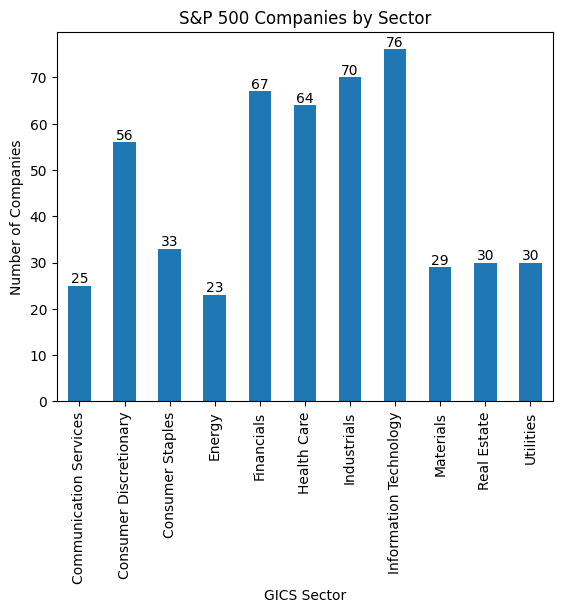

In [404]:
companies_by_sector.plot(kind='bar')

# Add labels to bars
for i, v in enumerate(companies_by_sector.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.title('S&P 500 Companies by Sector')
plt.xlabel('GICS Sector')
plt.ylabel('Number of Companies')

plt.show()

In [405]:
# We drop the column 'CIK' cause we wont use it
snp_500_index = snp_500_index.drop(['CIK'],axis=1)

In [406]:
# We drop the column 'Headquarters Location' cause we wont use it
snp_500_index = snp_500_index.drop(['Headquarters Location'],axis=1)

In [407]:
# We drop the column 'Founded' cause we wont use it
snp_500_index = snp_500_index.drop(['Founded'],axis=1)

## **Merging our previous 2 dataframe to makea new more robust**

In [408]:
# Merge by the "Symbol" field
sp500_total = pd.merge(snp_500_index, sp_500_rst, on='Symbol')

### **saving the data frame**

In [409]:
# I save sp500_total dataframe in csv file

sp500_total.to_csv('databases/sp500_total.csv', index = False)

In [410]:
# We open the sp_500_total dataframe

sp_500_total = pd.read_csv('databases/sp500_total.csv')

In [411]:
# We review our dataframe sp_500_total

sp_500_total

,Symbol,Security,GICS Sector,GICS Sub-Industry,Date added,Date,Open,High,Low,Close,Adj Close,Volume,day,Year
0,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525517,2173400,Monday,2000
1,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511255,2713800,Tuesday,2000
2,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221233,3699400,Wednesday,2000
3,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249746,5975800,Thursday,2000
4,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790693,4101200,Friday,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616657,ZTS,Zoetis,Health Care,Pharmaceuticals,2013-06-21,2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,Tuesday,2023
2616658,ZTS,Zoetis,Health Care,Pharmaceuticals,2013-06-21,2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,Wednesday,2023
2616659,ZTS,Zoetis,Health Care,Pharmaceuticals,2013-06-21,2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,Thursday,2023
2616660,ZTS,Zoetis,Health Care,Pharmaceuticals,2013-06-21,2023-02-17,172.149994,173.289993,170.259995,172.029999,172.029999,1954500,Friday,2023


In [412]:
# We make the index the date column to analyze
sp_500_total_date = sp_500_total

sp_500_total_date.set_index('Date', inplace=True)

sp_500_total_date.index = pd.to_datetime(sp_500_total_date.index)

### <p align=center> We analyze the Average annual return by sector <p>

In [413]:
# Group the data by sector and year, and calculate the average annual return

grouped_data = sp_500_total_date.groupby(['GICS Sector', pd.Grouper(freq='Y')])['Adj Close'].mean().reset_index()

grouped_data

,GICS Sector,Date,Adj Close
0,Communication Services,2000-12-31,16.077914
1,Communication Services,2001-12-31,14.594650
2,Communication Services,2002-12-31,12.576441
3,Communication Services,2003-12-31,13.196849
4,Communication Services,2004-12-31,14.574275
...,...,...,...
259,Utilities,2019-12-31,59.081224
260,Utilities,2020-12-31,60.866388
261,Utilities,2021-12-31,65.823857
262,Utilities,2022-12-31,72.602779


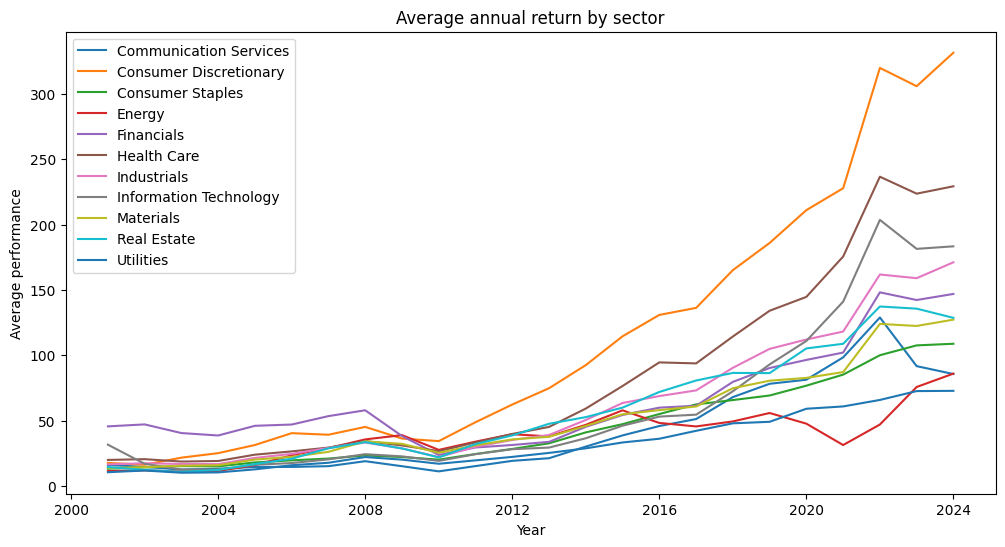

In [414]:
fig, ax = plt.subplots(figsize=(12,6))

# Iterate over each sector and graph its average annual return

for sector, data in grouped_data.groupby('GICS Sector'):
    ax.plot(data['Date'], data['Adj Close'], label=sector)

# Add a title and labels to the axes
ax.set_title('Average annual return by sector')
ax.set_xlabel('Year')
ax.set_ylabel('Average performance')
ax.legend()

plt.show()

#####  The adjusted closing price reflects the market value of the stock at the end of the day and can be a good measure of long-term performance.

##### The technology sector has been the best performer overall

### <p align=center> We analyze the Variation of closures over the years.<p>

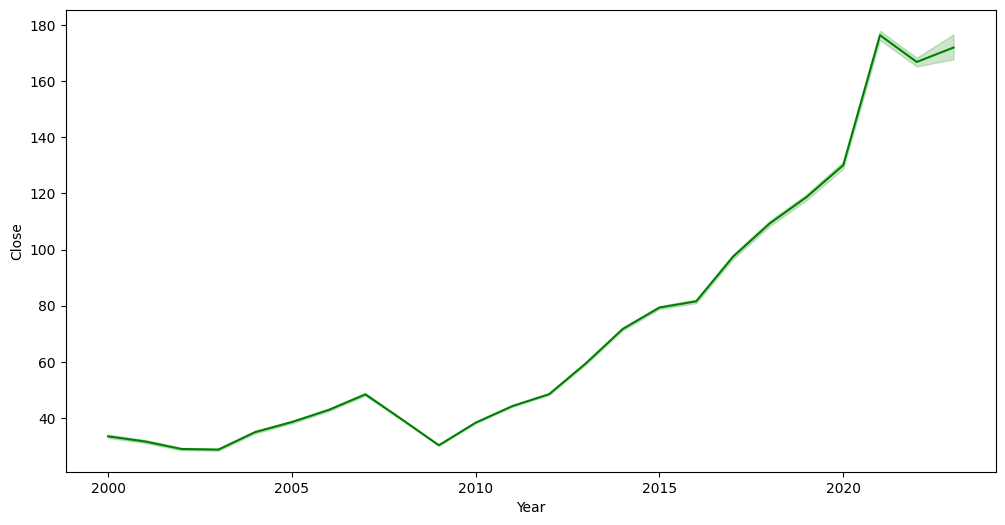

In [421]:
plt.subplots(figsize=(12, 6))
sns.lineplot(data= sp_500_total_date, x= 'Year', y= 'Close', color='g')
plt.show()

#### The variation from the closings of the year 2000 to the present has been very significant and has reflected a series of economic and political changes. The index has experienced a series of ups and downs, including the financial crisis of 2008, the tech boom of the 2010s, and the COVID-19 pandemic in 2020.

#### The index has shown a long-term upward trend, with a number of corrections and adjustments along the way. Despite the volatility, many companies have achieved consistent growth in the index, leading to significant returns for long-term investors.

#### Specialy in the tech industry where Apple Inc. (AAPL) , Microsoft Corporation (MSFT) , Alphabet Inc. Class A (GOOGL) , NVIDIA Corp (NVDA) and Meta Platforms Inc. (META) are Excellents choices of investment 